In [1]:
!python --version

Python 3.10.14


In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pwd

/home/user/energygpt/chronos


In [ ]:
datasets = ['IBlend', 'Enernoc']
# datasets = ['Prayas', 'MFRED', 'NEEA', 'NEST', 'Mathura', 'Bareilly', 'SMART-star', 'Ireland']

In [ ]:
def load_results(datasets, result_type):
    results = []
    for dataset in datasets:
        print(dataset)
        files = glob.glob(f'/home/user/energygpt/chronos/results/{dataset}/{result_type}*.csv')
        b_count = 0
        for f in files:            
            df = pd.read_csv(f)
            print(f, df.shape)
            print(f, df.shape, ' After filtering')
            df.insert(0, 'dataset', dataset)
            df.insert(0, 'result_type', result_type)
            df['filename'] = df.filename.apply(lambda s: os.path.basename(s))
            results.append(df)                
            b_count += df.shape[0]
        print(dataset, b_count, '\n')
            
    results_df = pd.concat(results)
    return results_df

In [ ]:
result_type = 'agg_metrics'
test_agg = load_results(datasets, result_type)
print(test_agg.shape)

IBlend
/home/user/energygpt/chronos/results/IBlend/agg_metrics_all_buildings_power_processed.csv (9, 9)
/home/user/energygpt/chronos/results/IBlend/agg_metrics_all_buildings_power_processed.csv (9, 9)  After filtering
IBlend 9 

Enernoc
/home/user/energygpt/chronos/results/Enernoc/agg_metrics_enernoc.csv (100, 9)
/home/user/energygpt/chronos/results/Enernoc/agg_metrics_enernoc.csv (100, 9)  After filtering
Enernoc 100 

(109, 11)


In [7]:
# test_agg.columns
test_agg[['NRMSE']].describe()

,NRMSE
count,109.000000
mean,0.272972
std,0.249331
min,0.035119
25%,0.104210
50%,0.222696
75%,0.365494
max,1.852693


In [9]:
test_agg[['SMAPE', 'NRMSE']].describe()

,SMAPE,NRMSE
count,109.000000,109.000000
mean,0.202570,0.272972
std,0.243230,0.249331
min,0.025464,0.035119
25%,0.060671,0.104210
50%,0.136777,0.222696
75%,0.215892,0.365494
max,1.761960,1.852693


## agg - Test - ALL

In [10]:
# For 168
combined = test_agg#pd.concat([test_agg, finetuned_agg])

combined.result_type = combined.result_type.str.replace('test_agg_metrics', 'Zero-shot')
combined.result_type = combined.result_type.str.replace('finetuned_agg_metrics', 'Fine-tuned')

cols = ['result_type', 'SMAPE', 'NRMSE']
res_agg1 = combined[cols].groupby(['result_type']).agg( {'SMAPE': ['mean', 'std', 'median'],
                                                        'NRMSE': ['mean', 'std', 'median']})

# res_agg1.mul(100).round(2).to_csv('./results_finetuned/commercial.csv')
# res_agg1.mul(100).round(2).to_latex('./results_finetuned/commercial.tex')
res_agg1.mul(100).round(2)

SMAPE               NRMSE              
              mean    std median  mean    std median
result_type                                         
agg_metrics  20.26  24.32  13.68  27.3  24.93  22.27

In [11]:
# For 24
combined = test_agg#pd.concat([test_agg, finetuned_agg])

combined.result_type = combined.result_type.str.replace('test_agg_metrics', 'Zero-shot')
combined.result_type = combined.result_type.str.replace('finetuned_agg_metrics', 'Fine-tuned')

cols = ['result_type', 'SMAPE', 'NRMSE']
res_agg1 = combined[cols].groupby(['result_type']).agg( {'SMAPE': ['mean', 'std', 'median'],
                                                        'NRMSE': ['mean', 'std', 'median']})

# res_agg1.mul(100).round(2).to_csv('./results_finetuned/commercial.csv')
# res_agg1.mul(100).round(2).to_latex('./results_finetuned/commercial.tex')
res_agg1.mul(100).round(2)

SMAPE               NRMSE              
              mean    std median  mean    std median
result_type                                         
agg_metrics  20.26  24.32  13.68  27.3  24.93  22.27

In [12]:
# For 24
#combined = pd.concat([test_agg, finetuned_agg])
#cols = ['result_type', 'dataset', 'sMAPE', 'NRMSE']
cols = ['result_type', 'dataset', 'NRMSE', 'SMAPE', 'MAE', 'MSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset']).agg( {'SMAPE': ['median'],
                                                                    'NRMSE': ['median'],
                                                                    'MAE': ['median']})
                                                                    
    # 'NRMSE': ['median']})

# res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
# res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
res_agg2.mul(100).round(2)

SMAPE  NRMSE      MAE
                    median median   median
result_type dataset                       
agg_metrics Enernoc  12.87  21.37  2558.28
            IBlend   68.47  25.46  6539.13

In [13]:
combined.filename.value_counts()/2

filename
LD2011_2014_clean=2014.csv    178.5
LD2011_2014_clean=2013.csv    165.5
LD2011_2014_clean=2012.csv    157.5
Rat_clean=2016.csv            138.5
G42000900.csv                 133.5
Rat_clean=2017.csv            131.0
LD2011_2014_clean=2011.csv     78.0
G27002300.csv                  71.5
Fox_clean=2017.csv             66.5
Fox_clean=2016.csv             66.0
Panther_clean=2017.csv         52.5
Bear_clean=2017.csv            45.5
G51059305.csv                  41.5
Bear_clean=2016.csv            39.0
G06000702.csv                  36.0
Name: count, dtype: float64

## add - Test vs. Finetuned - by dataset

In [11]:
# For 168
#combined = pd.concat([test_agg, finetuned_agg])
#cols = ['result_type', 'dataset', 'sMAPE', 'NRMSE']
cols = ['result_type', 'dataset', 'NRMSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})

# res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
# res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
res_agg2.mul(100).round(2)

NRMSE
                        median
result_type dataset           
agg_metrics Enernoc      21.37
            IBlend       25.46
            IBlend-test  19.90

In [15]:
combined

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
0,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_lodging_Stephen,6.585594,43.370047,4.390836,0.052777,0.051054,0.080739,0.693951
1,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_education_Virginia,7.305732,53.373726,3.750670,0.468725,0.325889,0.662080,0.815909
2,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_lodging_Stephan,2.477205,6.136543,1.679378,0.056696,0.054966,0.080852,0.649219
3,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_office_Israel,16.635654,276.744975,10.767507,0.099055,0.088836,0.134294,0.643978
4,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_education_Lilly,20.419247,416.945651,12.219198,0.065485,0.062883,0.107479,0.785425
...,...,...,...,...,...,...,...,...,...,...,...
67,agg_metrics,Buildings-900K-test,G06000702.csv,323861,6.948221,48.277782,4.872857,0.074479,0.074308,0.084884,0.784415
68,agg_metrics,Buildings-900K-test,G06000702.csv,325070,4.502525,20.272730,3.219182,0.066218,0.064895,0.075530,0.718038
69,agg_metrics,Buildings-900K-test,G06000702.csv,331630,6.447165,41.565939,4.768288,0.098081,0.096143,0.113318,0.749165
70,agg_metrics,Buildings-900K-test,G06000702.csv,341525,5.390236,29.054646,4.006897,0.348134,0.283072,0.393512,0.853207


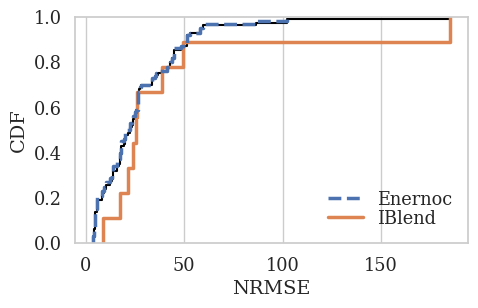

In [11]:
# sns.set(font_scale=1)  # crazy big
sns.set_theme(style="whitegrid", font_scale=1.16)


date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (5, 3.3)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# plt.figure(figsize=(3, 3))
fig, ax = plt.subplots()

copy_df = test_agg['NRMSE'].reset_index()
all_df = pd.DataFrame(copy_df['NRMSE'] * 100)
#assembly_df
all_df['cdf'] = all_df.rank(method = 'average', pct = True)
# all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True, color='black')
ax_c = seaborn.ecdfplot(data=all_df.sort_values('NRMSE'), x="NRMSE", ax=ax, color='black', lw=1.5)
# median = all_df.sort_values('NRMSE').quantile(0.5)
# plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# #plt.text(x = xmedian['NRMSE'], median['cdf'])
# plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))
# q_90 = all_df.sort_values('NRMSE').quantile(0.9)
# plt.scatter(x = q_90['NRMSE'], y = q_90['cdf'], color = 'red')
# plt.text(q_90['NRMSE'],  q_90['cdf'], '({}, {})'.format(q_90['NRMSE'].round(2),  q_90['cdf'].round(2)))
copy_df = test_agg.reset_index()
copy_df['NRMSE'] = copy_df['NRMSE'] * 100
copy_df = copy_df.sort_values('NRMSE')
# name = ['Mean', 'LCL', 'BOREALIS', 'IDEAL', 'SMART', 'SCEAUX']
ax_s = seaborn.ecdfplot(data=copy_df, x="NRMSE", hue='dataset', ax=ax, lw=2.5)


for lines, linestyle, legend_handle in zip(ax.lines[::-1], ['--', '-', 'dashdot'], ax.legend_.legend_handles):
    lines.set_linestyle(linestyle)
    legend_handle.set_linestyle(linestyle)

#plt.xlim(0,80)
# ax_s.set_xscale('log')
# ax_s.set_xlim(0, 450)
# ax.legend(labels=name)
sns.move_legend(ax, "lower right", title='', labelspacing=0.05, frameon=False)

plt.title(label='')
# plt.legend()
plt.ylabel("CDF")
#plt.ylim(0,125)
plt.xlabel("NRMSE")
#plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()
os.makedirs('Plots', exist_ok=True)
plt.subplots_adjust(wspace=0.05, hspace=0)
# plt.savefig("Plots/chronos-new-commercial-error-cdfplot.pdf", bbox_inches='tight')
plt.show()